In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

le = preprocessing.LabelEncoder()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Visualisation

get correlations of each features in dataset Plotting Heat Map to visualise correlation data better. Drwan for only features having high correlation 
(>0.4) with Target Variable

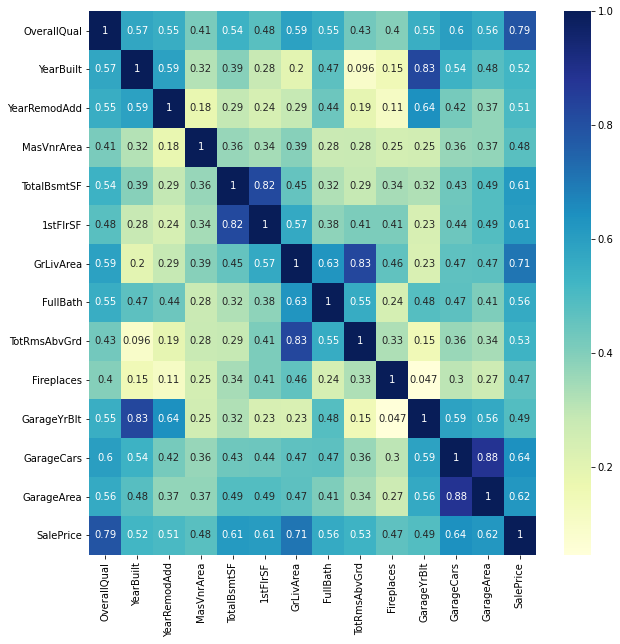

In [7]:
corr = train_df.corr()
top_corr_features = corr.index[abs(corr["SalePrice"])>0.4]

plt.figure(figsize=(10,10))
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

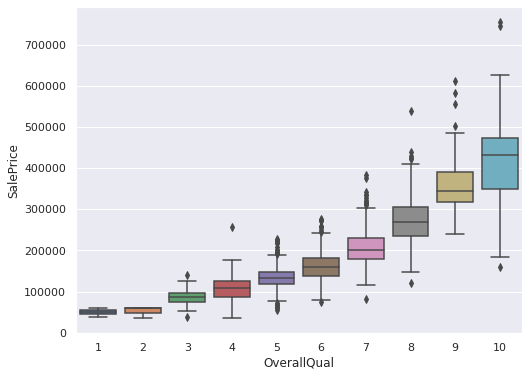

In [8]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)

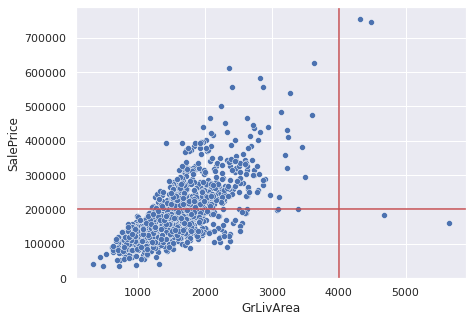

In [9]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

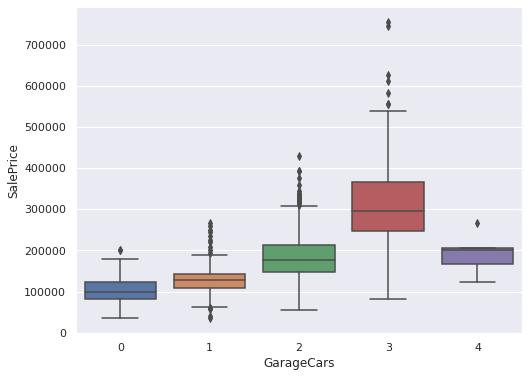

In [10]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='GarageCars', y='SalePrice', data=train_df)

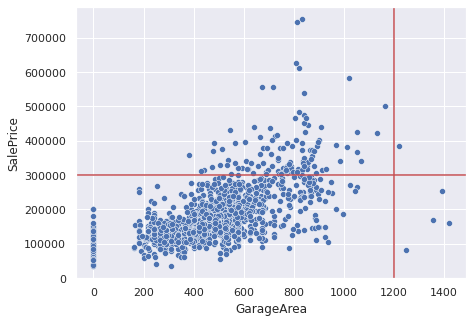

In [11]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_df)
plt.axvline(x=1200, color='r')
plt.axhline(y=300000, color='r')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

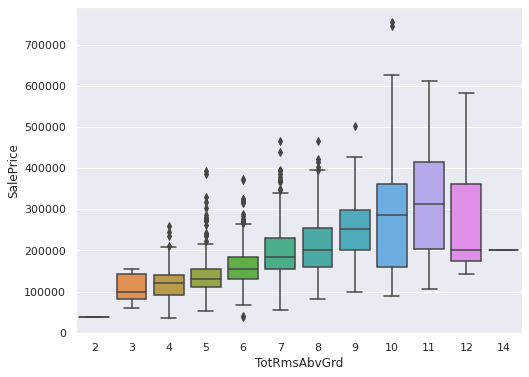

In [12]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

<Figure size 640x320 with 0 Axes>

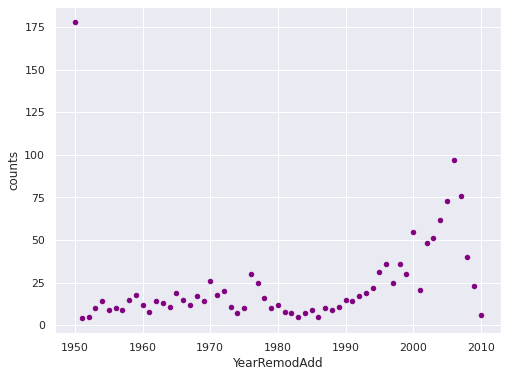

In [13]:
figure(figsize=(8, 4), dpi=80)
dt = train_df['YearRemodAdd'].value_counts().rename_axis('YearRemodAdd').reset_index(name='counts')
ax2 = dt.plot.scatter(x='YearRemodAdd', y='counts', c='purple', colormap='viridis')
plt.show()

# Handling missing data

In [14]:
def missing_percent_of_column(train_set):
    nan_percent = 100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [15]:
miss = missing_percent_of_column(train_df)
miss

,% of Misiing Values
PoolQC,99.5
MiscFeature,96.3
Alley,93.8
Fence,80.8
FireplaceQu,47.3
LotFrontage,17.7
GarageType,5.5
GarageYrBlt,5.5
GarageFinish,5.5
GarageQual,5.5


First 4 rows have more than 80% data missing, & these 4 column will not have bigger impact on deciding sales price,its better to remove them.

In [16]:
train_df = train_df.drop(['Id','Alley','PoolQC','MiscFeature','Fence'], axis=1)

I have followed below approach for handling missing data,

1. number column : Replace missing data with 0
1. string column: Replace missing data with 'None'

But I went with exception for below 3 columns,

1. Electrical column : We have only one row missing, so I preferred to drop that row
1. GarageYrBlt : I felt we can take median for this column
1. MasVnrType: This column already value as None, so went ahead with Other

In [17]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [18]:
train_df['FireplaceQu']= train_df['FireplaceQu'].fillna('None')

In [19]:
train_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [20]:
train_df['LotFrontage']= train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())

In [21]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [22]:
train_df['GarageCond']= train_df['GarageCond'].fillna('None')

In [23]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [24]:
train_df['GarageQual']= train_df['GarageQual'].fillna('None')

In [25]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [26]:
train_df['GarageFinish']= train_df['GarageFinish'].fillna('None')

In [27]:
train_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [28]:
train_df['GarageYrBlt']= train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())

In [29]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [30]:
train_df['GarageType']= train_df['GarageType'].fillna('None')

In [31]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [32]:
train_df['BsmtFinType2']= train_df['BsmtFinType2'].fillna('None')

In [33]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [34]:
train_df['BsmtExposure']= train_df['BsmtExposure'].fillna('None')

In [35]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [36]:
train_df['BsmtFinType1']= train_df['BsmtFinType1'].fillna('None')

In [37]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [38]:
train_df['BsmtCond']= train_df['BsmtCond'].fillna('None')

In [39]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [40]:
train_df['BsmtQual']= train_df['BsmtQual'].fillna('None')

In [41]:
train_df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [42]:
train_df['MasVnrArea']= train_df['MasVnrArea'].fillna(0)

In [43]:
train_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [44]:
train_df['MasVnrType']= train_df['MasVnrType'].fillna('Other')

In [45]:
train_df= train_df.dropna(axis=0, subset=['Electrical'])

# Handle outliers

In above graph where we have compared price with column 'GrLivArea', we did see few outlier values. We can remove those values to ensure those entries are not impacting our model.

In [46]:
#Deleting outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

# Converting to number

In [47]:
# Converting:
train_df= train_df.apply(lambda x: pd.factorize(x)[0])

# Test

In [48]:
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
test_df.shape

(1459, 80)

In [50]:
test_df = test_df.drop(['Alley','PoolQC','MiscFeature','Fence'], axis=1)

In [51]:
test_id = test_df['Id']

In [52]:
# Converting:
test_df = test_df.apply(lambda x: pd.factorize(x)[0])

# Prediction

I have tried 3 algorithm to build model, and checking performance for all of them. I have used below algorithm,
1. Linear Regression
1. Bayesian Regression
1. Ridge

In [53]:
X_train =  train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test  = test_df.drop("Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1457, 75), (1457,), (1459, 75))

In [54]:
from sklearn import datasets, linear_model


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [55]:
acc_reg = round(regr.score(X_train, Y_train) * 100, 2)
acc_reg

27.51

In [56]:
from sklearn.linear_model import BayesianRidge

BayReg = linear_model.BayesianRidge(n_iter=500,alpha_1=0.001)
BayReg.fit(X_train, Y_train)

y_pred_b = BayReg.predict(X_test)

acc_BayReg = round(BayReg.score(X_train, Y_train) * 100, 2)
acc_BayReg

19.99

In [57]:
acc_BayReg = round(BayReg.score(X_train, Y_train) * 100, 2)
acc_BayReg

19.99

In [58]:
import xgboost as xgb
from xgboost import plot_tree
xgb_model = xgb.XGBRegressor(subsample = 0.2, 
                             learning_rate=0.01,
                             max_depth=4, 
                             n_estimators=700).fit(X_train, Y_train)
print("Performance on train data:", xgb_model.score(X_train, Y_train))

Performance on train data: 0.5833093466496431


In [59]:
y_pred_x = xgb_model.predict(X_test)

Before using Ridge algorithm, we can use GridSearch to select better hyperparamters.

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -131.95590490851131
Best Hyperparameters: {'alpha': 0.0001, 'fit_intercept': False, 'normalize': False, 'solver': 'sag'}


In [61]:
from sklearn.linear_model import Ridge

BayReg = linear_model.Ridge(alpha= 0.01,fit_intercept= False, normalize= False, solver= 'sag')
BayReg.fit(X_train, Y_train)

y_pred_b = BayReg.predict(X_test)

In [62]:
acc_Reg1 = round(BayReg.score(X_train, Y_train) * 100, 2)
acc_Reg1

23.0

In [63]:
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'Id':test_id,'SalePrice':y_pred_b})

In [64]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = './HousePredictions.csv'

submission.to_csv(filename,index=False)

#print('Saved file: ' + filename)